### Plot Time Complexity of Matrix Multiplication Methods

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess

In [2]:
compiled_dir = f'..{os.sep}compiled'
plot_dir = f'..{os.sep}plots'

In [3]:
program_base_name = f'{compiled_dir}{os.sep}exercise_3'

In [4]:
opt_flags = ['O0', 'O1', 'O2', 'O3', 'Os', 'Ofast']
opt_flag_descriptors = [
    'Without optimization',
    'With O1 optimization',
    'With O2 optimization',
    'With O3 optimization',
    'With Os optimization',
    'With Ofast optimization'
]

In [5]:
plot_names = [f'{plot_dir}{os.sep}matmul_run_times_{opt}.pdf' for opt in opt_flags]

In [6]:
mat_sizes = np.array([10, 50, 100, 250, 500, 750, 1000])
run_times = np.zeros((len(opt_flags), 3, len(mat_sizes)))

Run each program with different input matrix sizes.

In [7]:
for i, flag in enumerate(opt_flags):
    for j, mat_dim in enumerate(mat_sizes):
        output = subprocess.run(
            [f'{program_base_name}_{flag}'],
            stdout=subprocess.PIPE,
            input="{}\n{}\n{}\n{}\n".format(mat_dim, mat_dim, mat_dim, mat_dim),
            encoding="ascii"
        )
        lines = output.stdout.split('\n')
        run_times[i, :, j] = [float(lines[idx].split('=')[1]) for idx in [3, 5, 1]]

Plot the results.

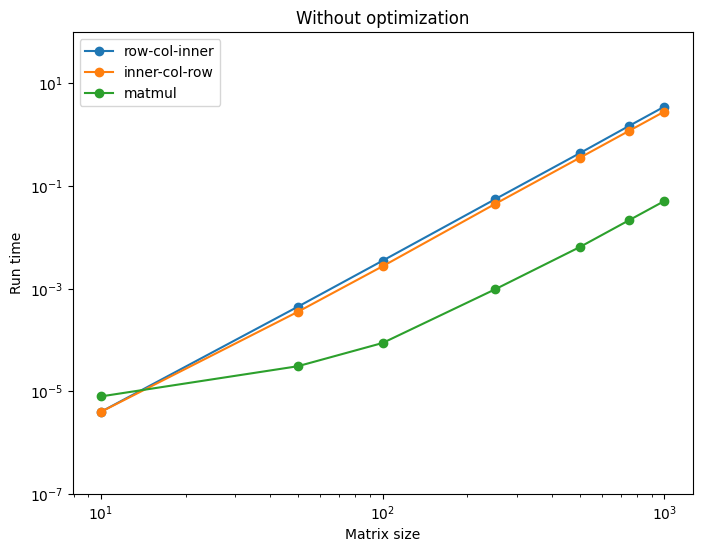

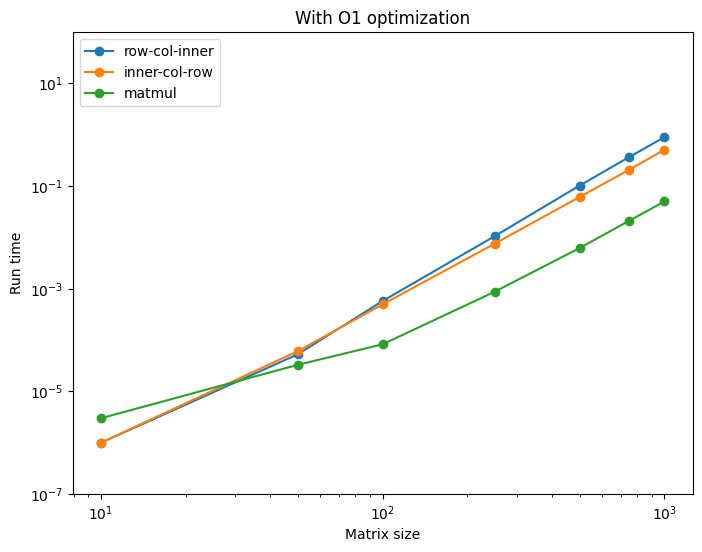

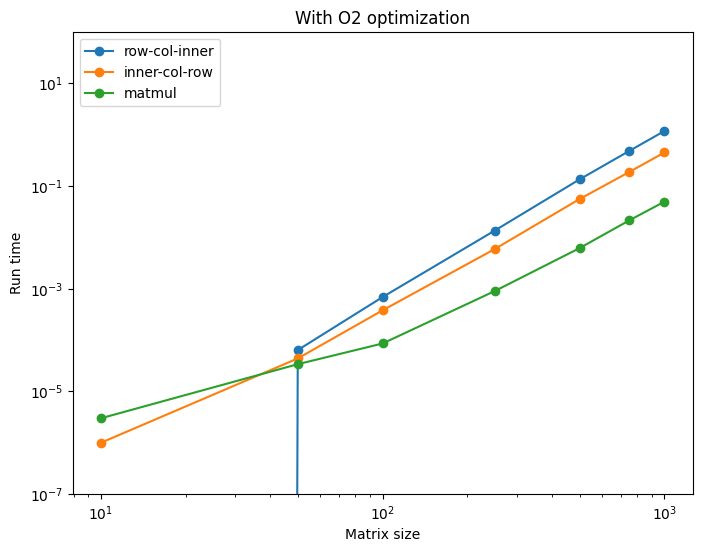

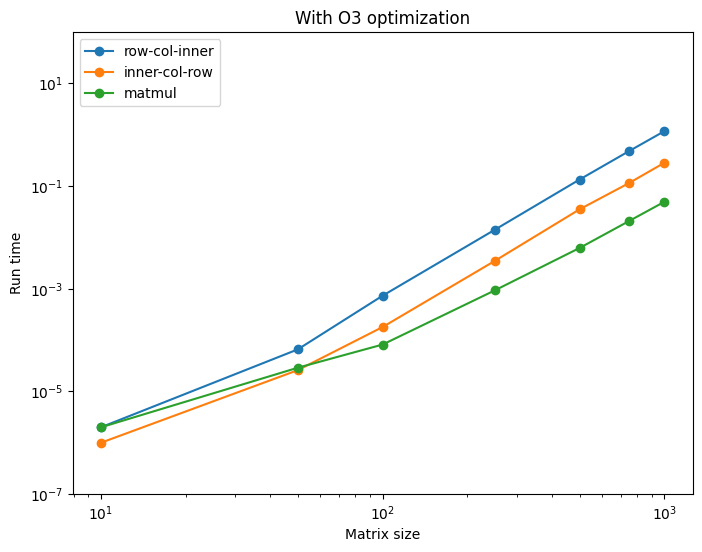

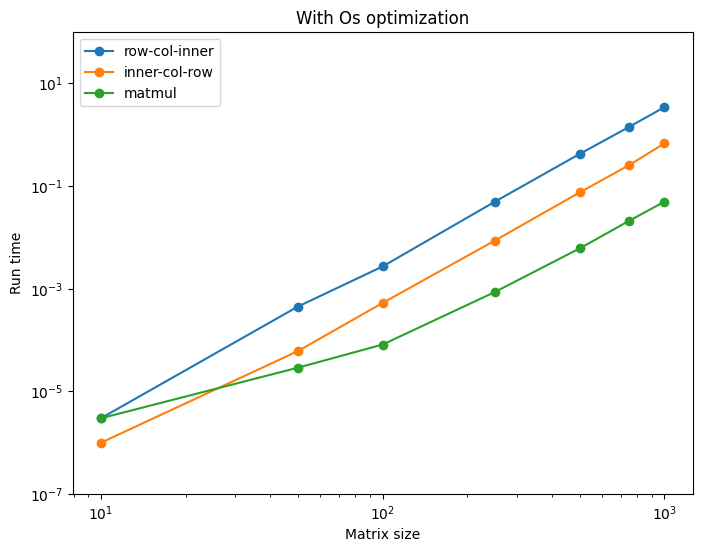

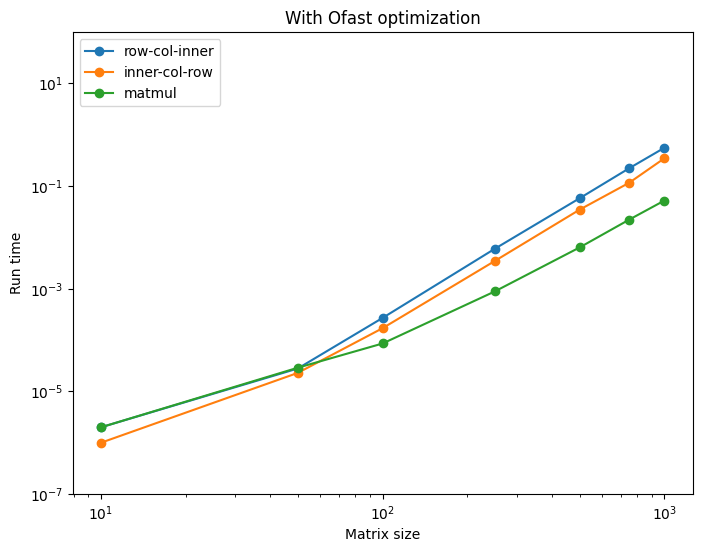

In [8]:
for i in range(len(opt_flags)):
    plt.figure(figsize=(8, 6))
    plt.loglog(mat_sizes, run_times[i, 0], 'o-', label='row-col-inner')
    plt.loglog(mat_sizes, run_times[i, 1], 'o-', label='inner-col-row')
    plt.loglog(mat_sizes, run_times[i, 2], 'o-', label='matmul')
    plt.title(opt_flag_descriptors[i])
    plt.xlabel('Matrix size')
    plt.ylabel('Run time')
    plt.ylim([1e-7, 1e2])
    plt.legend(loc='upper left')
    plt.savefig(plot_names[i], format="pdf", bbox_inches="tight");

Get complexity for different methods.

In [9]:
fit_params_1 = np.polyfit(np.log(mat_sizes), np.log(run_times[5, 0, :]), 1)
fit_params_2 = np.polyfit(np.log(mat_sizes), np.log(run_times[5, 1, :]), 1)
fit_params_3 = np.polyfit(np.log(mat_sizes), np.log(run_times[5, 2, :]), 1)
print(f"Complexity for row-col-inner is O(n^{fit_params_1[0]})")
print(f"Complexity for inner-col-row is O(n^{fit_params_2[0]})")
print(f"Complexity for matmul is O(n^{fit_params_3[0]})")

Complexity for row-col-inner is O(n^2.847159222164235)
Complexity for inner-col-row is O(n^2.8441740002423908)
Complexity for matmul is O(n^2.2408602984141126)
